<a href="https://colab.research.google.com/github/Hisork/sre2023/blob/main/Vse_po_novoy_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Вопрос 1:** Вывести график остатков для задачи про аукционные вина 

Вводм, сортируем данные:

In [3]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
year=[1890,1900,1920,1931,1934,1935,1940,1941,1944,1948,1950,1952, 1955, 1960]
delta=np.array([])
for data in year:
    delta=np.append(delta, 1972-data)
cost = np.array([50.00, 34.90, 25.00, 12.00, 15.00, 13.00, 6.98, 10.00, 5.99, 8.98, 6.98, 4.99, 5.98, 4.98])
print(delta)
print(cost)


[82. 72. 52. 41. 38. 37. 32. 31. 28. 24. 22. 20. 17. 12.]
[50.   34.9  25.   12.   15.   13.    6.98 10.    5.99  8.98  6.98  4.99
  5.98  4.98]


In [4]:
d=list(zip(delta,cost))
d.sort()
delta_sort=np.array([i[0] for i in d])
cost_sort=np.array([i[1] for i in d])
print(delta_sort)
print(cost_sort)


[12. 17. 20. 22. 24. 28. 31. 32. 37. 38. 41. 52. 72. 82.]
[ 4.98  5.98  4.99  6.98  8.98  5.99 10.    6.98 13.   15.   12.   25.
 34.9  50.  ]


Выводим график:

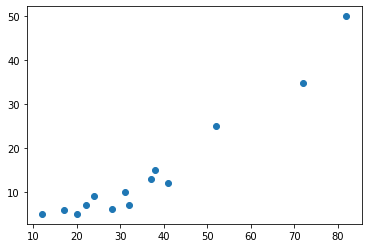

In [5]:
plt.plot(delta_sort, cost_sort, 'o')
plt.show()

Строим линейную модель:

In [6]:
N=len(cost_sort)
mx = sum(delta_sort)/N
my = cost_sort.sum()/N
a2 = np.dot(delta_sort.T, delta_sort)/N
a11 = np.dot(delta_sort.T, cost_sort)/N

kn = (a11 - mx*my)/(a2 - mx**2)
bn = my - kn*mx
fn = np.array([kn*z+bn for z in delta_sort])

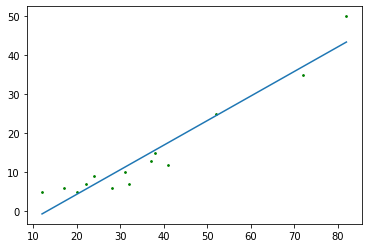

In [7]:
plt.scatter(delta_sort,cost_sort,s=3,c='green')
#plt.grid(True)
plt.plot(delta_sort,fn)
plt.show()

Строим график остатков

<function matplotlib.pyplot.show(close=None, block=None)>

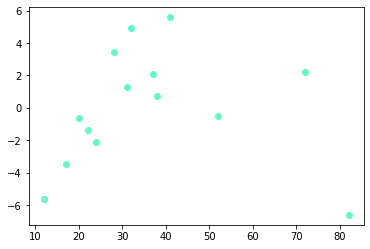

In [8]:
e=fn-cost_sort #считаем остатки
plt.scatter(delta_sort, e, color='#68f7cc')
plt.show


**Вопрос 2:** Видим, что график не показывает ярко выраженную закономерность между остатками и годами выдержки, что говорит о достаточно корректном посроении нашей линейной модели.

**Вопрос 3:** Выполнить аппроксимацию остатков полиномом:

<function matplotlib.pyplot.show(close=None, block=None)>

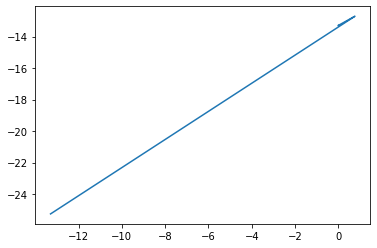

In [24]:
from scipy import interpolate

#poly = interpolate.KroghInterpolator(delta_sort, e)
#y_poly = poly(delta_sort)
#plt.plot(delta_sort, y_poly, label="Интерполирующий полином")
x_poly=np.polyfit(delta_sort, e, 3)
y_poly=np.polyval(x_poly, x_poly)
plt.plot(x_poly, y_poly)
plt.show
